# Temporal Networks v2.0 #

In [1]:
import RandTempNet.utils as tnu
import RandTempNet.measures as tnm
import numpy as np

tij_data = tnu.read_tij("./data/tij.dat")
tijtau_data = tnu.read_tijtau("./data/tijtau.dat")
seq_data = tnu.read_snapshot_sequence("./data/timeset.dat")
lks_data = tnu.read_link_timeline("./data/lks.dat")

## Measures ##
The `measures` module of the library contains functions to calculate standard measures for temporal networks.

Each function uses the data representation which is the most suitable for the analysis it is performing as input. This is to ensure that all necessary data conversions are transparent for the user and are not hidden within the functions.
### `degrees(list_lk)` ###
This function takes a list of `link()` objects as input, and returns a dictionary where keys are the nodes of the network and the values are the degrees of the nodes.

In [2]:
deg = tnm.degrees(lks_data.links())
print({n: deg[n] for n in list(deg)[:10]})

{513: 2, 771: 6, 134: 6, 778: 6, 267: 8, 268: 2, 271: 6, 15: 4, 17: 8, 272: 1}


### `activity_timeline(seq_data)` ###
This function takes a `snapshot_sequence()` object and returns a list containing the number of contacts occurring at each time step.

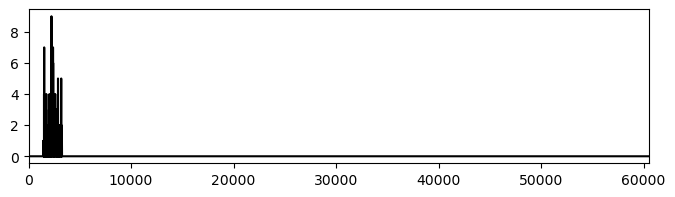

In [3]:
timeline = tnm.activity_timeline(seq_data)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,2))
nT = len(timeline)
plt.plot(range(nT),timeline,'k-')
plt.xlim((0,nT))
plt.show()

### `number_of_contacts(lks_data)` ###
This function takes a `link_timeline()` object as input and returns a dictionary where keys are `link()` objects and values are the number of contacts that occur on these links. A contact is defined as a continuous activation of a link during time.

In [4]:
numcont = tnm.number_of_contacts(lks_data)
print({lk.display(): numcont[lk] for lk in list(numcont.keys())[:10]})

{(185, 778): 1, (311, 496): 16, (448, 826): 1, (150, 196): 1, (95, 118): 1, (222, 223): 1, (119, 762): 1, (50, 771): 2, (196, 223): 2, (494, 765): 3}


### `weights(lks_data)` ###
This function takes a `link_timeline()` object as input and returns a dictionary where keys are `link()` objects and values are the weight of these links, defined as the total activation duration between two nodes.

In [5]:
w = tnm.weights(lks_data)
print({lk.display(): w[lk] for lk in list(w.keys())[:10]})

{(185, 778): 1, (311, 496): 30, (448, 826): 1, (150, 196): 1, (95, 118): 6, (222, 223): 2, (119, 762): 1, (50, 771): 3, (196, 223): 3, (494, 765): 4}


### `contact_durations(lks_data)` ###
This function takes a `link_timeline()` object and returns a dictionary where keys are `link()` objects and values are the list of contact durations of these links.

In [6]:
tau = tnm.contact_durations(lks_data)
print({lk.display(): tau[lk] for lk in list(tau.keys())[:10]})

{(185, 778): [1], (311, 496): [3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 6], (448, 826): [1], (150, 196): [1], (95, 118): [6], (222, 223): [2], (119, 762): [1], (50, 771): [2, 1], (196, 223): [2, 1], (494, 765): [2, 1, 1]}


### `intercontact_durations(lks_data)` ###
This function takes a `link_timeline()` object and returns a dictionary where keys are `link()` objects and values are the list of intercontact durations of these links.

In [7]:
dtau = tnm.intercontact_durations(lks_data)
print({lk.display():dtau[lk] for lk in list(dtau.keys())[:10]})

{(185, 778): [], (311, 496): [103, 423, 8, 56, 7, 4, 11, 2, 13, 1, 11, 3, 7, 3, 1], (448, 826): [], (150, 196): [], (95, 118): [], (222, 223): [], (119, 762): [], (50, 771): [375], (196, 223): [558], (494, 765): [4, 82]}


### `strengths(lks_data)` ###
This function takes a `link_timeline()` object and returns a dictionary with nodes as keys and their strength as values.

In [8]:
s = tnm.strengths(lks_data)
print({n:s[n] for n in list(s.keys())[:10]})

{513: 5, 771: 11, 134: 11, 778: 60, 267: 110, 268: 23, 15: 22, 271: 48, 17: 30, 272: 1}


### `node_timelines(tij_data,dt)` ###
This function takes a `tij()` object and returns a dictionary with nodes as keys and their timeline of activation as values. It necessitates to specify the value `dt` of the time step, since the assumption is that contiguous activation events of a node form a full node activation. Note that this structure is not a proper representation of the data, as all information about links is lost. This function is used to compute the following three analyses, namely node activities, node activation durations, and node inter-activation durations.

In [9]:
ntl_data = tnm.node_timelines(tij_data,1)
print({n:ntl_data[n] for n in list(ntl_data.keys())[:3]})

{513: [(2102, 1), (2109, 1), (2133, 1), (2144, 1), (2206, 1)], 771: [(1522, 6), (1925, 1), (2150, 2), (2527, 1), (2530, 1)], 134: [(2231, 2), (2239, 6), (2486, 1), (2654, 1), (2707, 1)]}


### `activities(tij_data)` ###
This function takes a `tij()` object and returns a dictionary with nodes as keys and their activity as values, *i.e.* the number of contacts in which they are involved.

In [10]:
ntl_data = tnm.activities(lks_data)
print({n:ntl_data[n] for n in list(ntl_data.keys())[:10]})

{513: 5, 771: 7, 134: 9, 778: 19, 267: 38, 268: 15, 15: 13, 271: 25, 17: 17, 272: 1}


### `activity_durations(tij_data,dt)` ###
This function takes a `tij()` object and returns a dictionary where keys are nodes and values are the list of activity durations of these nodes, *i.e.* the durations of continuous activity periods. It necessitates to specify the value `dt` of the time step, since the assumption is that contiguous activation events of a node form a full node activation.

In [11]:
alpha = tnm.activity_durations(tij_data,1)
print({n:alpha[n][:10] for n in list(alpha.keys())[:10]})

{513: [1, 1, 1, 1, 1], 771: [6, 1, 2, 1, 1], 134: [2, 6, 1, 1, 1], 778: [1, 1, 1, 1, 2, 1, 1, 3, 3, 4], 267: [1, 5, 3, 26, 3, 1, 4, 1, 2, 1], 268: [1, 4, 1, 2, 2, 1, 1, 1, 1, 1], 271: [1, 1, 2, 1, 1, 3, 13, 3, 1, 2], 15: [1, 1, 5, 4, 2, 1, 1, 3, 2, 2], 17: [1, 3, 11, 3, 2, 2, 1, 1, 1, 2], 272: [1]}


### `inactivity_durations(tij_data,dt)` ###
This function takes a `tij()` object and returns a dictionary where keys are nodes and values are the list of inactivity durations of these nodes. It necessitates to specify the value `dt` of the time step, since the assumption is that contiguous activation events of a node form a full node activation.

In [12]:
dalpha = tnm.inactivity_durations(tij_data,1)
print({n:dalpha[n][:10] for n in list(dalpha.keys())[:10]})

{513: [7, 24, 11, 62], 771: [403, 225, 377, 3], 134: [8, 247, 168, 53], 778: [5, 4, 4, 319, 31, 381, 312, 5, 5, 6], 267: [286, 640, 4, 19, 5, 3, 4, 2, 5, 3], 268: [163, 8, 3, 6, 5, 2, 29, 6, 53, 21], 271: [35, 14, 13, 3, 5, 4, 16, 8, 13, 3], 15: [481, 4, 8, 8, 5, 747, 24, 30, 198], 17: [3, 2, 10, 158, 6, 127, 10, 177, 15, 154], 272: []}


### `analysis(lks_data,dt,save=True,filename="analysis.pdf")` ###
This function takes a `link_timeline()` object, computes all the previous analysis and plots a recap figure. If `save` is set to `True`, it saves the figure under a file defined by `filename` (set by default to "analysis.pdf"), otherwise it just shows it.

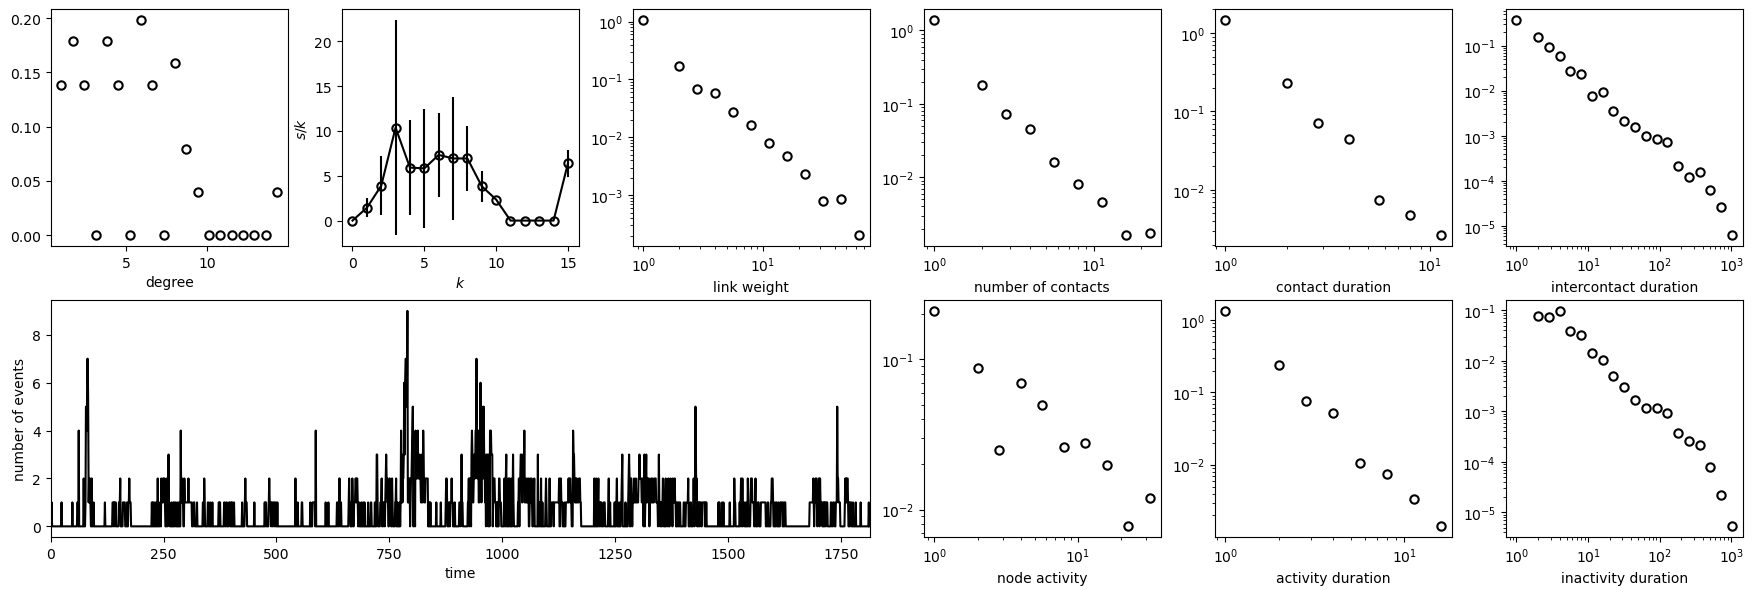

In [13]:
tnm.analysis(lks_data,1,save=False)